In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [27]:
from pathlib import Path
from typing import *

Path.ls = lambda x: L(x.iterdir())

In [23]:
def listify(obj):
    if obj is None: return []
    if isinstance(obj, list): return obj
    if isinstance(obj, str): return [obj]
    if isinstance(obj, Iterable): return list(obj)
    return [obj]

In [22]:
class L:
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        if isinstance(idx, (int, slice)): return self.items[idx]
        if isinstance(idx[0], bool):
            assert len(idx)==len(self)
            return [o for m, o in zip(idx, self.items) if m]
        return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i]=o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res= f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+'...]'
        return res

In [11]:
path=Path(r'd:/datasets/small_datasets/house-prices-advanced-regression-techniques/')
path.ls()

[WindowsPath('d:/datasets/small_datasets/house-prices-advanced-regression-techniques/data_description.txt'),
 WindowsPath('d:/datasets/small_datasets/house-prices-advanced-regression-techniques/sample_submission.csv'),
 WindowsPath('d:/datasets/small_datasets/house-prices-advanced-regression-techniques/test.csv'),
 WindowsPath('d:/datasets/small_datasets/house-prices-advanced-regression-techniques/train.csv')]

In [28]:
df=pd.read_csv(path.joinpath('train.csv'))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.shape

(1460, 81)

In [29]:
def check_missing(df):
    return L(col for col in df.columns if df[col].isnull().mean()>0)

In [32]:
mis_cols=check_missing(df)
mis_cols

L (19 items)
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical'...]

In [33]:
df[mis_cols].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [35]:
df_mis=df[mis_cols].isnull().mean()
df_mis=pd.DataFrame(df_mis.reset_index())
df_mis.columns=['column_name', 'percentage']
df_mis.sort_values(by='percentage',ascending=False, inplace=True)
df_mis

,column_name,percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


In [37]:
mis_les=L(var for var in df.columns if df[var].isnull().mean()<0.05)
mis_les

L (70 items)
['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope'...]

In [38]:
df_nomis=df[mis_les].dropna()
df_nomis.shape, df.shape

((1412, 70), (1460, 81))

In [46]:
df_nomis['GrLivArea'].dtype

dtype('int64')

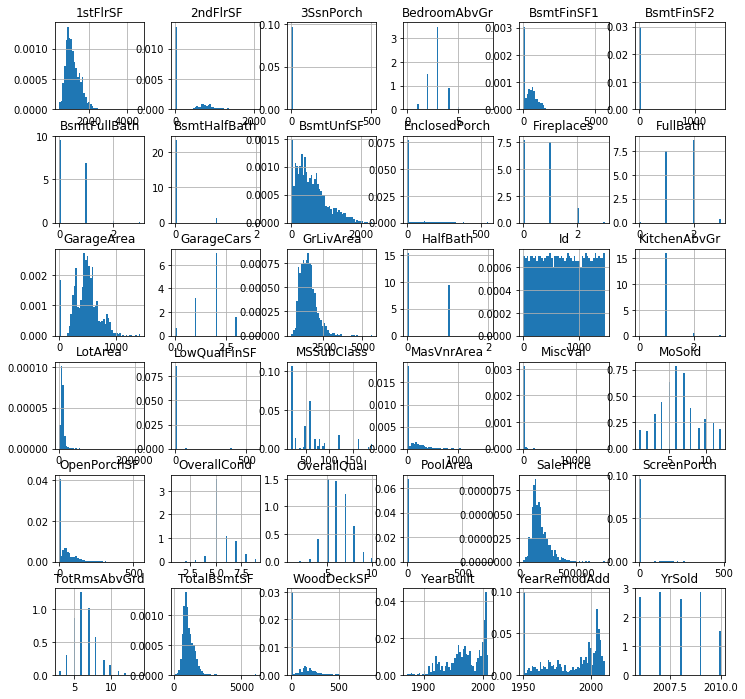

In [40]:
df_nomis.hist(bins=50, density=True, figsize=(12,12))
plt.show()

### data distribution comparison after removing NAs

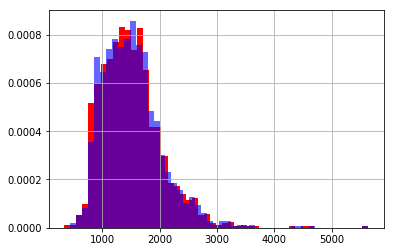

In [47]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['GrLivArea'].hist(bins=50, density=True, ax=ax, color='red')
df_nomis['GrLivArea'].hist(bins=50, density=True, ax=ax, color='blue', alpha=0.6)

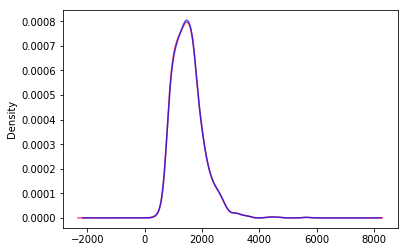

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['GrLivArea'].plot.density(color='red', alpha=0.7)

# data after cca
df_nomis['GrLivArea'].plot.density(color='blue', alpha=0.7)

In [50]:
def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [52]:
categorical_distribution(df, df_nomis, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [53]:
categorical_distribution(df, df_nomis, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


## mean and median imputations

In [83]:
path=Path(r'd:\datasets\loan')
path.ls()

L (1 items)
[WindowsPath('d:/datasets/loan/loan.csv')]

In [84]:
df1=pd.read_csv(path.joinpath('loan.csv'), skiprows=lambda x: x>0 and np.random.rand()> 0.01)
df1.shape

D:\narain\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(22449, 145)

In [86]:
mis=df1.isnull().mean()
df_mis=pd.DataFrame(mis.reset_index())
df_mis.columns=['column_name', 'percentage']
df_mis.sort_values(by='percentage',ascending=False, inplace=True)
df_mis

,column_name,percentage
0,id,1.000000
18,url,1.000000
1,member_id,1.000000
134,orig_projected_additional_accrued_interest,0.996125
131,hardship_length,0.995323
124,hardship_reason,0.995323
125,hardship_status,0.995323
126,deferral_term,0.995323
127,hardship_amount,0.995323
128,hardship_start_date,0.995323


In [58]:
def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [87]:
median = df['MasVnrArea'].median()

df.loc[:,'MasVnrArea_median'] = impute_na(df, 'MasVnrArea', median)
#X_test.loc[:,'MasVnrArea_median'] = impute_na(df, 'MasVnrArea', median)

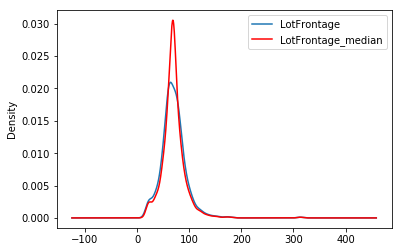

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['LotFrontage'].plot(kind='kde', ax=ax)
median = df['LotFrontage'].median()

df.loc[:,'LotFrontage_median'] = impute_na(df, 'LotFrontage', median)
# variable imputed with the median
df['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

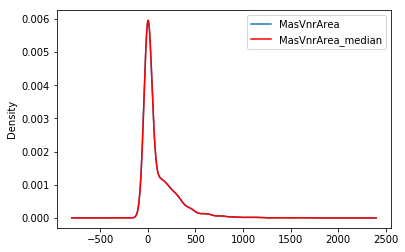

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
df['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [93]:
print('Original Variance: ', df['LotFrontage'].var())
print('Variance after median imputation: ', df['LotFrontage_median'].var())

Original Variance:  589.7491687482642
Variance after median imputation:  485.218557935159


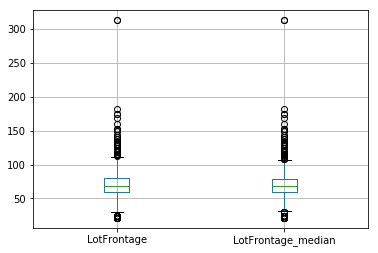

In [95]:
df[['LotFrontage', 'LotFrontage_median']].boxplot()

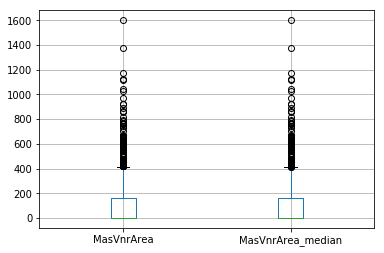

In [96]:
df[['MasVnrArea', 'MasVnrArea_median']].boxplot()

## Arbitrary value imputation

the missing values are imputed randomly
they disrupt the original distribution

In [102]:
def impute_na(df, variable, value):
    return df[variable].fillna(value)

## Automatic feature imputation

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

In [105]:
path=Path(r'd:/datasets/small_datasets/house-prices-advanced-regression-techniques/')
df=pd.read_csv(path.joinpath('train.csv'))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('SalePrice', axis=1),  # just the features
    df['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  

In [107]:
features_categorical = [c for c in df.columns if df[c].dtypes=='O']

# find numerical variables
# those different from object and also excluding the target SalePrice
features_numerical = [c for c in df.columns if df[c].dtypes!='O' and c !='SalePrice']

In [108]:
df[features_categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [109]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, features_numerical),
        ('categorical', categorical_transformer, features_categorical)])


In [110]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Lasso(max_iter=2000))])

In [111]:
param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, iid=False, n_jobs=-1, scoring='r2')

In [116]:
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.933


In [117]:
grid_search.best_params_

{'classifier__alpha': 100,
 'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median'}